# Install and Import Modules 

In [4]:
pip install neuralprophet

  Using cached holidays-0.21.13-py3-none-any.whl (378 kB)
  Attempting uninstall: holidays
    Found existing installation: holidays 0.36
    Uninstalling holidays-0.36:
      Successfully uninstalled holidays-0.36
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.5 requires holidays>=0.25, but you have holidays 0.21.13 which is incompatible.


In [6]:
from neuralprophet import NeuralProphet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Read and Preprocess the Data

In [27]:
stock_symbol = 'GOOGL' #Samsung
start_date = '2015-01-01'
end_date = '2023-01-01'

stock_data = yf.download(stock_symbol, start = start_date, end=end_date)

print(stock_data.head())
stock_data.to_csv('stock_data.csv')

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  26.629999  26.790001  26.393999  26.477501  26.477501  26480000
2015-01-05  26.357500  26.399500  25.887501  25.973000  25.973000  41182000
2015-01-06  26.025000  26.060499  25.277500  25.332001  25.332001  54456000
2015-01-07  25.547501  25.574499  25.182501  25.257500  25.257500  46918000
2015-01-08  25.075500  25.375000  24.750999  25.345501  25.345501  73054000


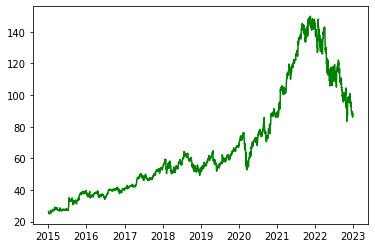

In [28]:
stocks = pd.read_csv('stock_data.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks = stocks[['Date', 'Close']]
stocks.columns = ['ds', 'y']

plt.plot(stocks['ds'], stocks['y'], label = 'actual', c = 'g')
plt.show()

# Train the Model

In [29]:
model = NeuralProphet()
model.fit(stocks)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.375% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 157
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (63) is too small than the required number for the learning rate finder (233). The results might not be optimal.


Finding best initial lr:   0%|          | 0/233 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,107.182297,134.590958,0.418151,0.0,0
1,101.901688,127.672646,0.386302,0.0,1
2,95.475792,119.344917,0.347859,0.0,2
3,87.128403,108.560379,0.299363,0.0,3
4,76.215584,94.484680,0.237957,0.0,4
...,...,...,...,...,...
152,7.250566,10.983958,0.004541,0.0,152
153,7.244500,10.958083,0.004543,0.0,153
154,7.235168,10.959465,0.004533,0.0,154
155,7.233440,10.977217,0.004532,0.0,155


# Evaluate the Model

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.375% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Predicting: 63it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.375% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.375% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B


Predicting: 63it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


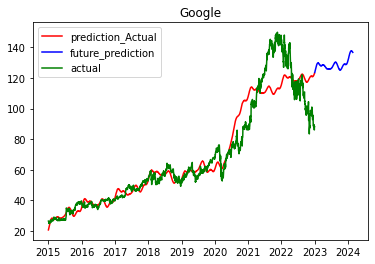

In [32]:
future = model.make_future_dataframe(stocks, periods = 300)

forecast = model.predict(future)
actual_prediction = model.predict(stocks)

plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label = "prediction_Actual", c = 'r')
plt.plot(forecast['ds'], forecast['yhat1'], label = 'future_prediction', c = 'b')
plt.plot(stocks['ds'], stocks['y'], label = 'actual', c = 'g')
plt.legend()
plt.title('Google')
plt.show()

In [31]:
model.plot_components(forecast)

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': '79391d2f-229a-47ae-8997-c0624a2aa7f9',
              'x': array([datetime.datetime(2023, 1, 2, 0, 0),
                          datetime.datetime(2023, 1, 3, 0, 0),
                          datetime.datetime(2023, 1, 4, 0, 0), ...,
                          datetime.datetime(2024, 2, 21, 0, 0),
                          datetime.datetime(2024, 2, 22, 0, 0),
                          datetime.datetime(2024, 2, 23, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([137.48962402, 137.51118469, 137.53276062, ..., 146.44067383,
                          146.46226501, 146.48382568]),
              'yaxis': 'y'},
             {'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'yearly seasonalit